In [1]:
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc.graph
%matplotlib inline

# Chapter 3 - Inferences with binomials
## 3.1 Inferring a rate


Inferring the rate $\theta$ of a binary process  
$$ \theta \sim \text{Beta}(1, 1)  $$
$$ k \sim \text{Binomial} ( \theta, n)  $$

In the example, we set k = 5 and n = 10

Applied logodds-transform to theta and added transformed theta_logodds to model.
Assigned NUTS to theta_logodds
 [-----------------100%-----------------] 3000 of 3000 complete in 0.4 sec

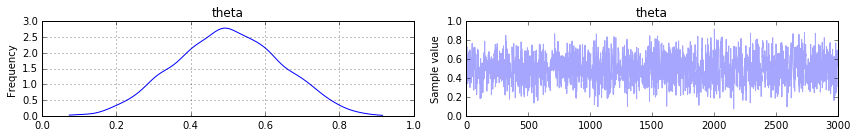

In [9]:
# Data
k = np.array([5])
n = np.array([10])

with pm.Model() as model1:
    # prior
    theta = pm.Beta("theta", alpha = 1,beta = 1)
    x = pm.Binomial('x', n = n, p = theta, observed=k)
    trace1 = pm.sample(3e3,  model=model1)

pm.traceplot(trace1[:],varnames=['theta']);

And generate a picture that is identical to 3.2 one on page 39 of Wagenmakers, 2013:

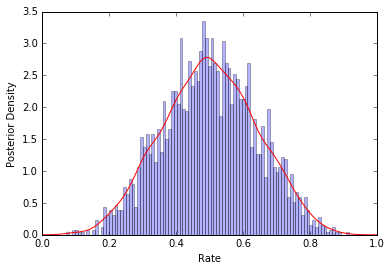

In [10]:
import matplotlib.pyplot as plt
from scipy.stats.kde import gaussian_kde # for plotting: to calculate a continuous 
                                         # approximation of the posterior and prior densities. 
from pylab import plot, hist, show #for plotting

my_pdf = gaussian_kde(trace1['theta'][:])
x=np.linspace(0, 1, 100)
plot(x,my_pdf(x),'r') # distribution function
hist(trace1['theta'][:], bins=100, normed=1,alpha=.3)
plt.xlabel('Rate')
plt.ylabel('Posterior Density')
plt.show()

In [15]:
pm.summary(trace1,varnames=['theta'])# gives the same credible interval as in the book.


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.501            0.140            0.004            [0.234, 0.771]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.228          0.404          0.498          0.600          0.770



## 3.2 Difference between two rates

Inferring the rate $\theta$ of two binary process  
$$ \theta \sim \text{Beta}(1, 1)  $$
$$ k \sim \text{Binomial} ( \theta, n)  $$

In the example, we set k1 = 5, n1 = 10 and k2 = 7, n2 = 10 

The model involve a deterministic part in pymc, model specification is save in Rate_2.py

```python
import pymc
import numpy as np

k1 = 5
n1 = 10
k2 = 7
n2 = 10

theta1 = pymc.Beta("theta1", alpha = 1,beta = 1)
theta2 = pymc.Beta("theta2", alpha = 1,beta = 1)

x1 = pymc.Binomial('x1', n = n1, p = theta1, value = k1, observed=True)
x2 = pymc.Binomial('x2', n = n2, p = theta2, value = k2, observed=True)

@pymc.deterministic
def delta(a = theta1, b = theta2):
    return a - b
```

 [-----------------100%-----------------] 20000 of 20000 complete in 1.6 secPlotting delta
Plotting theta1
Plotting theta2


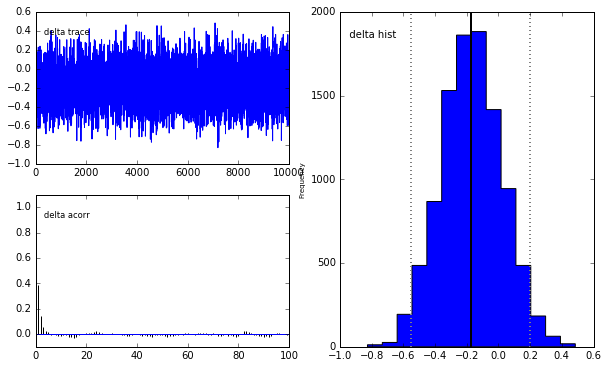

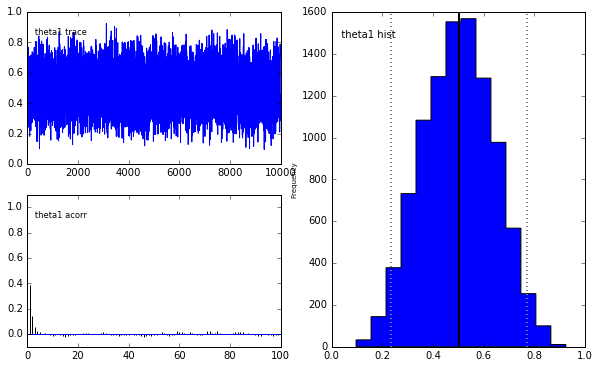

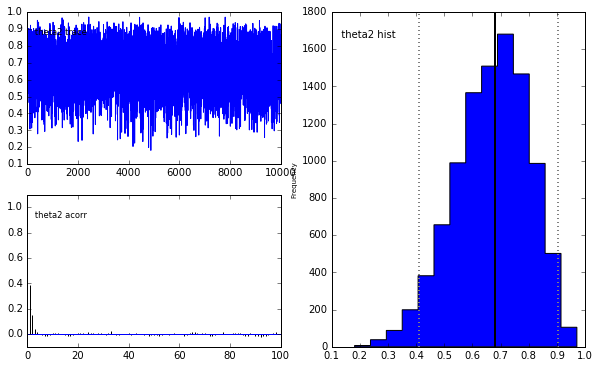

In [4]:
import pymc
import Rate_2
%matplotlib inline

S = pymc.MCMC(Rate_2)
S.sample(iter = 20000, burn = 50, thin = 2)

pymc.Matplot.plot(S)

 [-----------------100%-----------------] 20000 of 20000 complete in 1.6 secPlotting delta
Plotting theta1
Plotting theta2


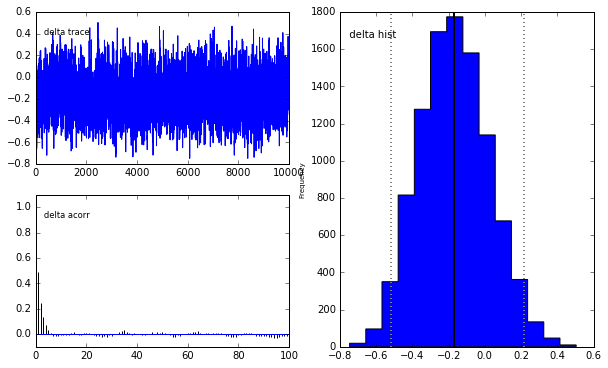

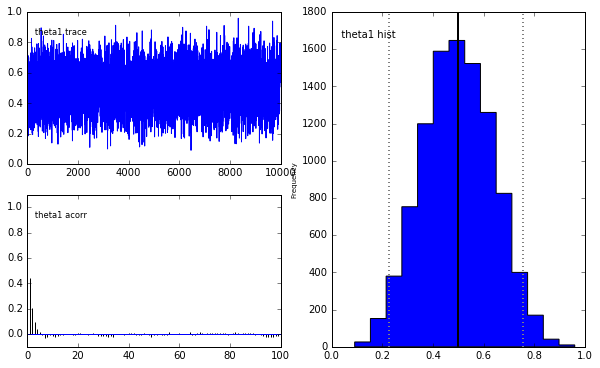

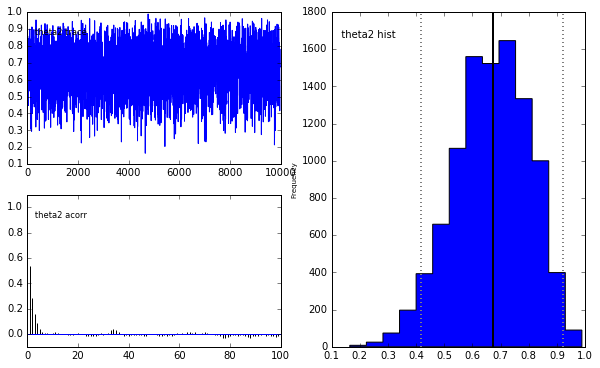

In [5]:
# specify the model here is fine as well

import pymc
import numpy as np
%matplotlib inline

k1 = 5
n1 = 10
k2 = 7
n2 = 10

theta1 = pymc.Beta("theta1", alpha = 1,beta = 1)
theta2 = pymc.Beta("theta2", alpha = 1,beta = 1)

x1 = pymc.Binomial('x1', n = n1, p = theta1, value = k1, observed=True)
x2 = pymc.Binomial('x2', n = n2, p = theta2, value = k2, observed=True)

@pymc.deterministic
def delta(a = theta1, b = theta2):
    return a - b

S = pymc.MCMC([delta,theta1,x1,theta2,x2])
S.sample(iter = 20000, burn = 50, thin = 2)

pymc.Matplot.plot(S)

In [6]:
S.stats()

{'delta': {'95% HPD interval': array([-0.51725282,  0.2186474 ]),
  'mc error': 0.0033277520053862789,
  'mean': -0.16929321759341764,
  'n': 9975,
  'quantiles': {2.5: -0.51895727127463853,
   25: -0.30532377703137897,
   50: -0.1720966664595367,
   75: -0.041385834968174995,
   97.5: 0.21859057985953312},
  'standard deviation': 0.19122041839216927},
 'theta1': {'95% HPD interval': array([ 0.22590881,  0.75538842]),
  'mc error': 0.0019199593572035525,
  'mean': 0.49772503920175915,
  'n': 9975,
  'quantiles': {2.5: 0.23297522689255146,
   25: 0.40016268269804561,
   50: 0.49680609731104319,
   75: 0.59648076120447246,
   97.5: 0.76500696877416718},
  'standard deviation': 0.13808332774929608},
 'theta2': {'95% HPD interval': array([ 0.41909467,  0.92050009]),
  'mc error': 0.002227438858564231,
  'mean': 0.6670182567951769,
  'n': 9975,
  'quantiles': {2.5: 0.39169618673409079,
   25: 0.5804317150500411,
   50: 0.67394807801027801,
   75: 0.76876854979037601,
   97.5: 0.898367055925

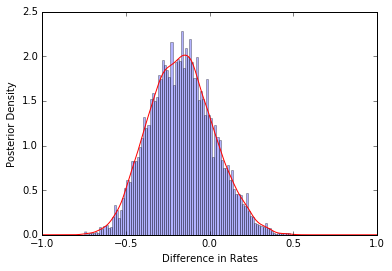

In [7]:
my_pdf = gaussian_kde(S.trace('delta', chain=None)[:])
x=np.linspace(-1, 1, 200)
plot(x,my_pdf(x),'r') # distribution function

hist(S.trace('delta', chain=None)[:],bins=100, normed=1,alpha=.3)
plt.xlabel('Difference in Rates')
plt.ylabel('Posterior Density')

## 3.3 Inferring a common rate

 [-----------------100%-----------------] 20000 of 20000 complete in 0.8 secPlotting theta


{'theta': {'95% HPD interval': array([ 0.38915687,  0.7828266 ]),
  'mc error': 0.0015815559590885667,
  'mean': 0.59174608630477277,
  'n': 9975,
  'quantiles': {2.5: 0.38628173723742776,
   25: 0.52467243473692526,
   50: 0.596410392326157,
   75: 0.66524752817381916,
   97.5: 0.78225490898608607},
  'standard deviation': 0.1020820569865931}}

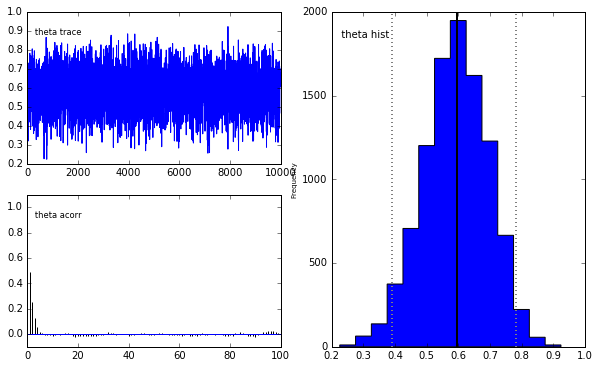

In [8]:
# Multiple trials
k = np.array([5, 7])
n = np.array([10, 10])

theta = pymc.Beta("theta", alpha = 1,beta = 1)
x = pymc.Binomial('x', n = n, p = theta, value = k, observed=True)

testmodel = pymc.Model([theta, x])
mcmc = pymc.MCMC(testmodel)
mcmc.sample(iter = 20000, burn = 50, thin = 2)

pred_theta = mcmc.trace("theta")[:]

pymc.Matplot.plot(mcmc)
mcmc.stats()

 [-----------------100%-----------------] 20000 of 20000 complete in 0.9 secPlotting theta


{'theta': {'95% HPD interval': array([ 0.39562309,  0.79064894]),
  'mc error': 0.0017024746947512284,
  'mean': 0.58966086185117805,
  'n': 9975,
  'quantiles': {2.5: 0.38716959444450516,
   25: 0.52030272105564601,
   50: 0.59133576669312005,
   75: 0.66178706706713541,
   97.5: 0.7835673941303043},
  'standard deviation': 0.10220679426609118}}

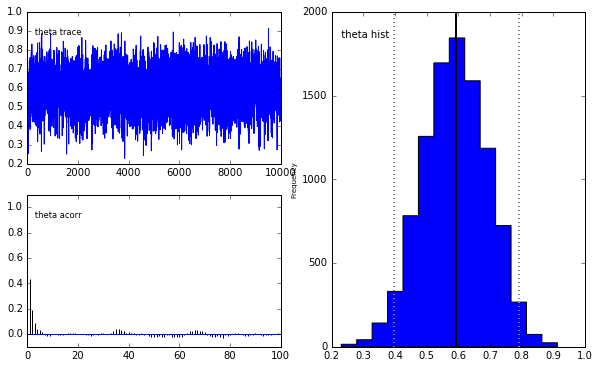

In [9]:
# or as in the book:
k1 = 5
n1 = 10
k2 = 7
n2 = 10

theta = pymc.Beta("theta", alpha = 1,beta = 1)

x1 = pymc.Binomial('x1', n = n1, p = theta, value = k1, observed=True)
x2 = pymc.Binomial('x2', n = n2, p = theta, value = k2, observed=True)

testmodel = pymc.Model([theta, x1, x2])
M3 = pymc.MCMC(testmodel)
M3.sample(iter = 20000, burn = 50, thin = 2)

pred_theta = M3.trace("theta")[:]

pymc.Matplot.plot(M3)
M3.stats()

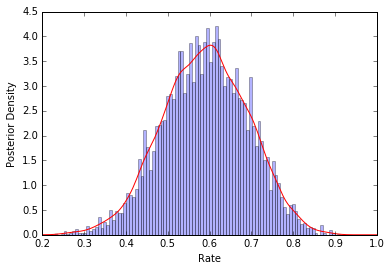

In [10]:
my_pdf = gaussian_kde(M3.trace('theta', chain=None)[:])
x=np.linspace(0.2, 1, 200)
plot(x,my_pdf(x),'r') # distribution function

hist(M3.trace('theta', chain=None)[:],bins=100, normed=1,alpha=.3)
plt.xlabel('Rate')
plt.ylabel('Posterior Density')

## 3.4 Prior and posterior prediction

 [-----------------100%-----------------] 20000 of 20000 complete in 2.0 sec

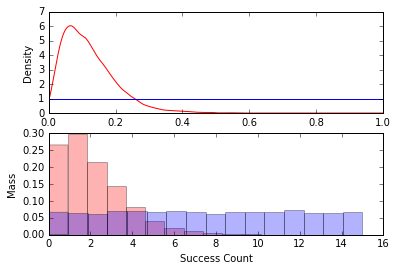

In [11]:
k = 1
n = 15
# Uncomment for Trompetter Data
# k = 24
# n = 121

# prior
theta = pymc.Beta("theta", alpha = 1,beta = 1)

x = pymc.Binomial('x', n = n, p = theta)
mc = pymc.MCMC([theta,x])
mc.sample(10000)
prior_x=x.trace()

x = pymc.Binomial('x', n = n, p = theta, value = k, observed=True)
predict = pymc.Binomial('predict', n = n, p = theta)

testmodel = pymc.Model([theta, x, predict])
mcmc = pymc.MCMC(testmodel)
mcmc.sample(iter = 20000, burn = 50, thin = 2)

pred_theta = mcmc.trace("theta")[:]

plt.subplot(2, 1, 1)
my_pdf = gaussian_kde(pred_theta)
x=np.linspace(0, 1, 1000)
plot(x,my_pdf(x),'r', label="Posterior") # distribution function
from scipy.stats import beta
plt.plot(x, beta.pdf(x, 1, 1),'b',label='Prior')
plt.xlabel('Rate')
plt.ylabel('Density')

predictx = mcmc.trace("predict")[:]
plt.subplot(2, 1, 2)
hist(predictx,normed=1,bins=len(np.unique(predictx)),alpha=.3,color='r', label="Posterior")
hist(prior_x,normed=1,bins=n+1,alpha=.3,color='b', label="Prior")
plt.xlabel('Success Count')
plt.ylabel('Mass')
plt.show()

## 3.5 Posterior Predictive

 [-----------------100%-----------------] 20000 of 20000 complete in 2.3 secPlotting theta
Plotting predict1
Plotting predict2


{'predict1': {'95% HPD interval': array([  2.,  10.]),
  'mc error': 0.042507854115011685,
  'mean': 6.7558897243107765,
  'n': 9975,
  'quantiles': {2.5: 2.0, 25: 5.0, 50: 7.0, 75: 8.0, 97.5: 11.0},
  'standard deviation': 2.1901257440628132},
 'predict2': {'95% HPD interval': array([ 1.,  8.]),
  'mc error': 0.033020416770253767,
  'mean': 5.2132330827067666,
  'n': 9975,
  'quantiles': {2.5: 2.0, 25: 4.0, 50: 5.0, 75: 7.0, 97.5: 9.0},
  'standard deviation': 1.8531407528660913},
 'theta': {'95% HPD interval': array([ 0.32130314,  0.70675562]),
  'mc error': 0.0028022149917157858,
  'mean': 0.52043125013063452,
  'n': 9975,
  'quantiles': {2.5: 0.33122401741455643,
   25: 0.45322071706732664,
   50: 0.51688688075856271,
   75: 0.58764553710433698,
   97.5: 0.72202293523461114},
  'standard deviation': 0.098332907145744428}}

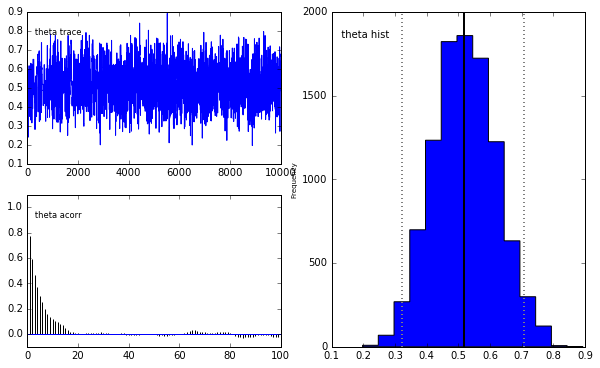

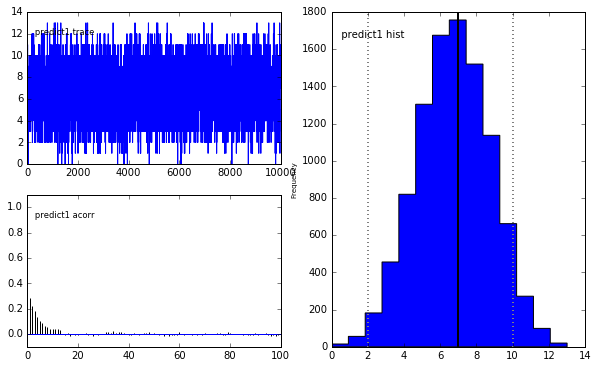

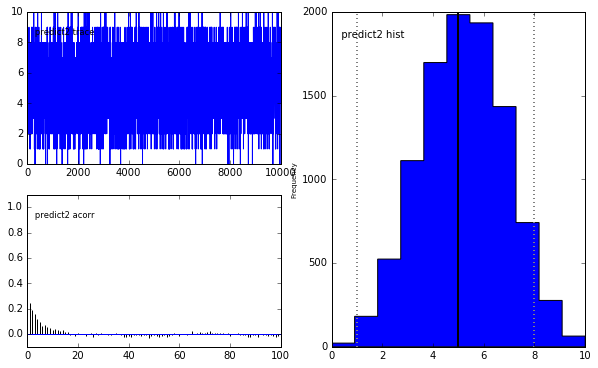

In [12]:
# Inferring a Common Rate, With Posterior Predictive
k1 = 2
n1 = 13
k2 = 10
n2 = 10

theta = pymc.Beta("theta", alpha = 1,beta = 1)

x1 = pymc.Binomial('x1', n = n1, p = theta, value = k1, observed=True)
x2 = pymc.Binomial('x2', n = n2, p = theta, value = k2, observed=True)

predict1 = pymc.Binomial('predict1', n = n1, p = theta)
predict2 = pymc.Binomial('predict2', n = n2, p = theta)

testmodel = pymc.Model([theta, x1, x2, predict1,predict2])

M3 = pymc.MCMC(testmodel)
M3.sample(iter = 20000, burn = 50, thin = 2)

pred_theta = M3.trace("theta")[:]

pymc.Matplot.plot(M3)
M3.stats()

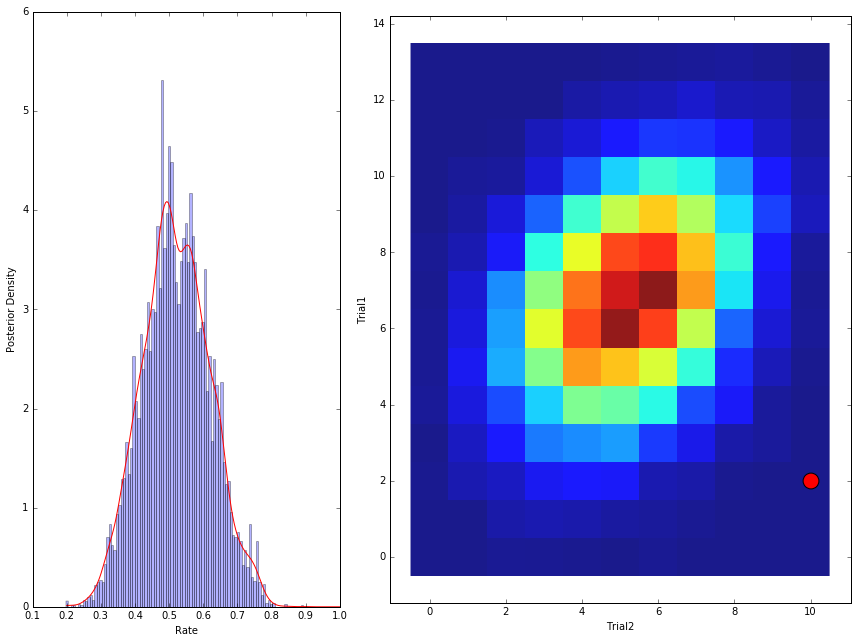

In [13]:
from matplotlib import gridspec

fig = plt.figure(figsize=(12, 9)) 
gs = gridspec.GridSpec(1,2, width_ratios=[2, 3]) 
ax0 = plt.subplot(gs[0])

my_pdf = gaussian_kde(M3.trace('theta', chain=None)[:])
x=np.linspace(0.2, 1, 200)
ax0.plot(x,my_pdf(x),'r') # distribution function

ax0.hist(M3.trace('theta', chain=None)[:], bins=100, normed=1,alpha=.3)
plt.xlabel('Rate')
plt.ylabel('Posterior Density')

ax1 = plt.subplot(gs[1])
predx1=M3.trace("predict1")[:]
predx2=M3.trace("predict2")[:]
# plt.hist2d(predx1, predx2, bins=10,alpha=0.6)
# plt.show()
# 
# plt.subplot(1,3,3)
from scipy import sparse
A = sparse.csc_matrix((np.ones(len(predx1)),(predx1,predx2)),shape=(n1+1,n2+1)).todense()
ax1.imshow(A,interpolation="none",alpha=.9)
ax1.scatter(k2,k1,s=250,c=[1,0,0])
plt.gca().invert_yaxis()
plt.xlabel('Trial2')
plt.ylabel('Trial1')
plt.tight_layout()

## 3.5 Joint distributions

Assigned Metropolis to TotalN
 [-----------------100%-----------------] 50000 of 50000 complete in 36.1 sec

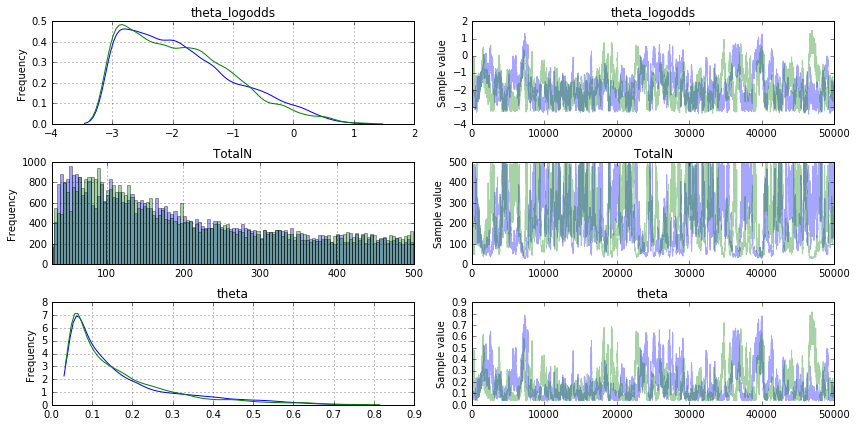

In [14]:
# Using pymc3
import numpy as np
import pymc3 as pm
import pandas as pd

with pm.Model() as testmodel:
    # the Survey example in the book
    k = np.array([16,18,22,25,27])
    nmax = 500
    m = len(k)
    
    theta = pm.Beta("theta", alpha = 1,beta = 1)
    TotalN = pm.DiscreteUniform("TotalN",lower=1, upper=nmax)
    
    x = pm.Binomial('x', n = TotalN, p = theta, observed = k)
    
    # predict = pm.Binomial('predict', n = TotalN, p = theta)

with testmodel:
    # start = pm.find_MAP()
    # step = pm.NUTS(scaling=start)
    # M3 = pm.sample(50000, step, start=start)
    step2 = pm.NUTS()
    # step2 = pm.HamiltonianMC()
    M3 = pm.sample(50000, step = step2,njobs=2)

pm.traceplot(M3[50:]);

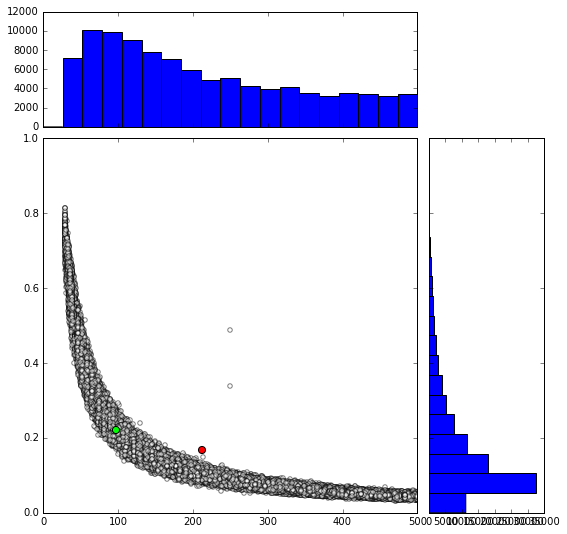

In [15]:
# First calculate MLE:
from scipy.special import *

%matplotlib inline

thetapost = M3['theta'][500:]
npost = M3['TotalN'][500:]
cc = -float('Inf')
ind = 0

for i in range(0, len(npost)):
    logL = 0
    for j in k:   
        logL = logL+gammaln(npost[i]+1)-gammaln(j+1)-gammaln(npost[i] - j +1)
        logL = logL+j*np.log(thetapost[i])+(npost[i]-j)*np.log(1-thetapost[i])
    
    if logL > cc: 
        ind = i
        cc = logL
        
# print(ind)

from matplotlib.ticker import NullFormatter
nullfmt = NullFormatter()         # no labels
y = M3['theta'][500:]
x = M3['TotalN'][500:]

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x, y,c=[1,1,1],alpha=.5)
axScatter.scatter(np.mean(x), np.mean(y),s=50,c=[1,0,0],alpha=1)
axScatter.scatter(x[ind], y[ind],s=50,c=[0,1,0],alpha=1)

# now determine nice limits by hand:
binwidth1 = 0.25
axScatter.set_xlim((0, nmax))
axScatter.set_ylim((0, 1))

bins1 = np.linspace(0, nmax, 20)
axHistx.hist(x, bins=bins1)
bins2 = np.linspace(0, 1, 20)
axHisty.hist(y, bins=bins2, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

 [-----------------100%-----------------] 50000 of 50000 complete in 9.8 secPlotting TotalN
Plotting theta
Plotting predict


{'TotalN': {'95% HPD interval': array([  37.,  449.]),
  'mc error': 10.602872778745176,
  'mean': 224.23611611611611,
  'n': 24975,
  'quantiles': {2.5: 55.0, 25: 107.0, 50: 202.0, 75: 329.0, 97.5: 473.0},
  'standard deviation': 128.15493791908128},
 'predict': {'95% HPD interval': array([ 12.,  30.]),
  'mc error': 0.036649727543209214,
  'mean': 21.73053053053053,
  'n': 24975,
  'quantiles': {2.5: 13.0, 25: 18.0, 50: 22.0, 75: 25.0, 97.5: 32.0},
  'standard deviation': 4.7299462163991723},
 'theta': {'95% HPD interval': array([ 0.03889885,  0.34914337]),
  'mc error': 0.0086609762887848388,
  'mean': 0.14565179085806346,
  'n': 24975,
  'quantiles': {2.5: 0.044870699597211253,
   25: 0.066036625053768366,
   50: 0.10745532209038514,
   75: 0.20139263859647302,
   97.5: 0.40224927875601341},
  'standard deviation': 0.10384848570143215}}

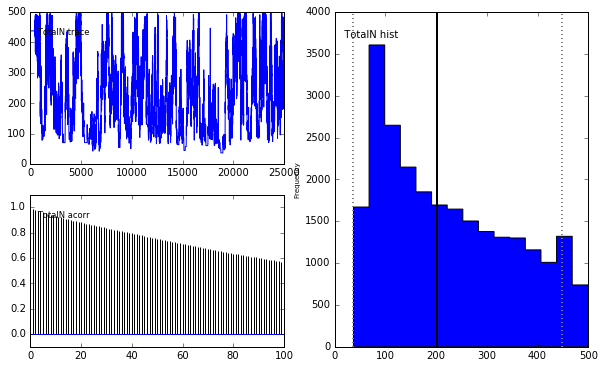

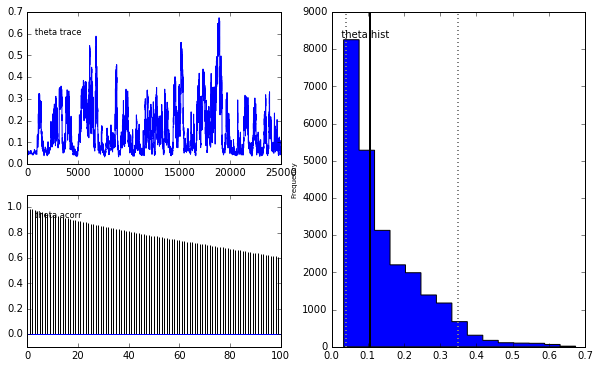

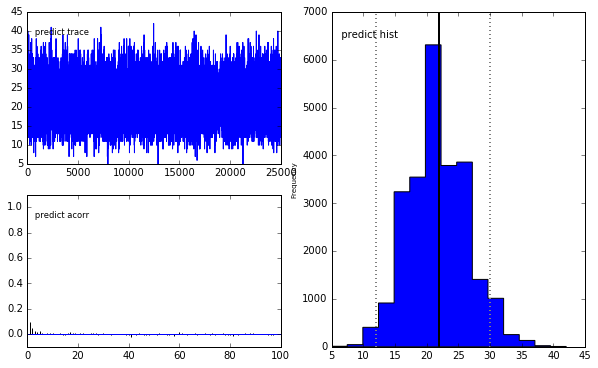

In [18]:
# the Survey example in the book, using pymc2
k = np.array([16,18,22,25,27])
nmax = 500
m = len(k)

theta = pymc.Beta("theta", alpha = 1,beta = 1)
TotalN = pymc.Categorical("TotalN",p = np.ones(nmax)/nmax)
    
x = pymc.Binomial('x', n = TotalN, p = theta, value = k, observed=True)
    
predict = pymc.Binomial('predict', n = TotalN, p = theta)
    
testmodel = pymc.Model([theta, x, TotalN, predict])

M3 = pymc.MCMC(testmodel)

M3.sample(iter = 50000, burn = 50, thin = 2)

y = M3.trace("theta")[51:]
x = M3.trace("TotalN")[51:]

pymc.Matplot.plot(M3)
M3.stats()


17239


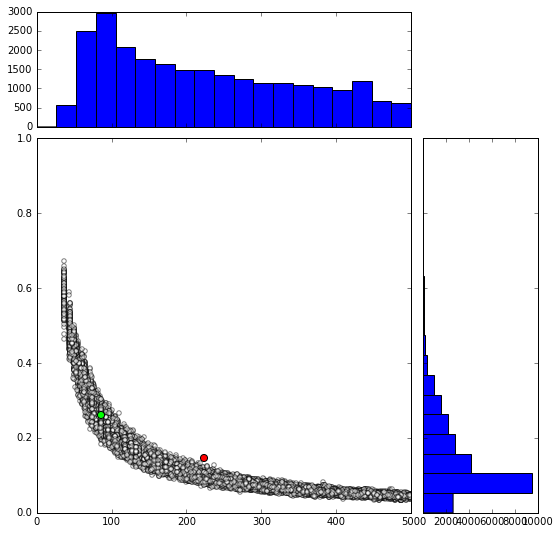

In [19]:
# First calculate MLE:
from scipy.special import *
thetapost = M3.trace("theta")[:]
npost = M3.trace("TotalN")[:]
cc = -float('Inf')
ind = 0

for i in range(0, len(npost)):
    logL = 0
    for j in k:   
        logL = logL+gammaln(npost[i]+1)-gammaln(j+1)-gammaln(npost[i] - j +1)
        logL = logL+j*np.log(thetapost[i])+(npost[i]-j)*np.log(1-thetapost[i])
    
    if logL > cc: 
        ind = i
        cc = logL
        
print(ind)

from matplotlib.ticker import NullFormatter
nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x, y,c=[1,1,1],alpha=.5)
axScatter.scatter(np.mean(x), np.mean(y),s=50,c=[1,0,0],alpha=1)
axScatter.scatter(x[ind], y[ind],s=50,c=[0,1,0],alpha=1)

# now determine nice limits by hand:
binwidth1 = 0.25
axScatter.set_xlim((0, nmax))
axScatter.set_ylim((0, 1))

bins1 = np.linspace(0, nmax, 20)
axHistx.hist(x, bins=bins1)
bins2 = np.linspace(0, 1, 20)
axHisty.hist(y, bins=bins2, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

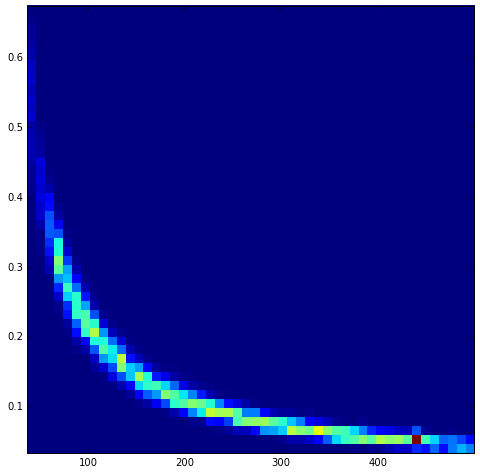

In [25]:
plt.figure(1, figsize=(8, 8))
plt.hist2d(x, y, bins=50)
plt.show()